# Exploratory Data Analysis: Customer Churn

This notebook explores the Telco Customer Churn dataset with the goal of understanding the key factors associated with customer churn.  
The insights derived here will guide feature engineering and model selection in subsequent stages.


**1. Imports & Configuration**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


**2. Data Loading**

In [7]:
df = pd.read_csv("../data/raw_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset consists of customer-level information including demographics, service usage, billing details, and churn status.


**3. Dataset Overview**

In [8]:
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

**Observations:**
- The dataset contains X rows and Y columns.
- The target variable is `Churn`, indicating whether a customer has left the service.
- The feature set includes both numerical and categorical variables, making it suitable for supervised classification.


**4. Target Variable Analysis (Churn)**

In [9]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

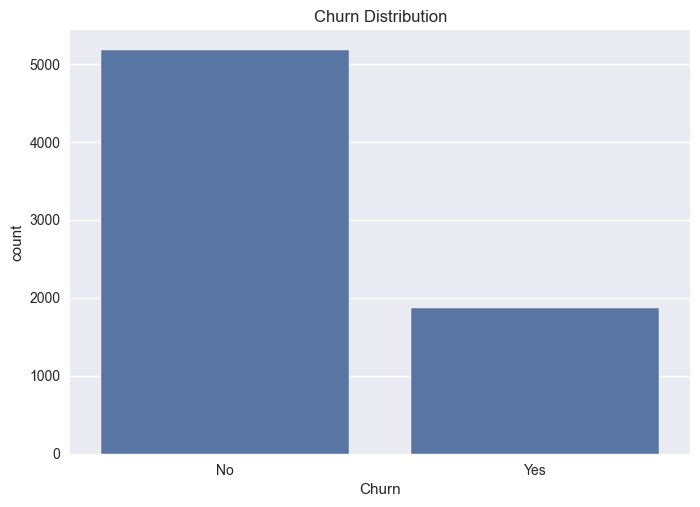

In [10]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

**Insights:**
- The dataset exhibits a moderate class imbalance.
- Approximately XX% of customers have churned.
- This suggests that accuracy alone may be misleading, motivating the use of ROC-AUC and recall-based metrics.


**5. Numerical Features Analysis**

5.1 Distribution of Numerical Variables

In [11]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_features].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


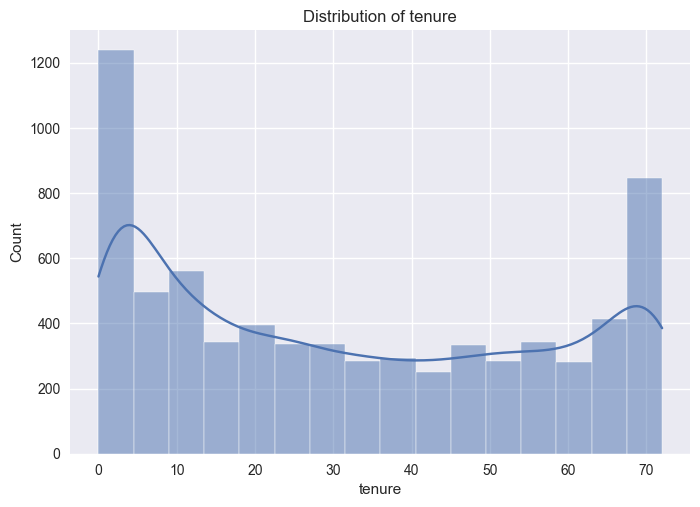

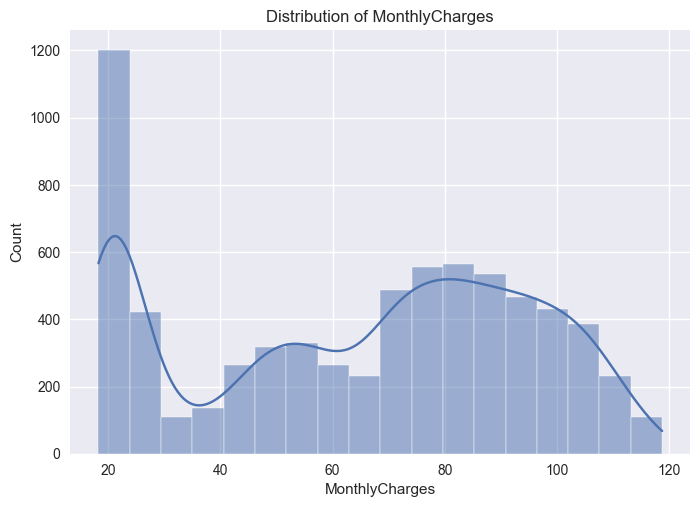

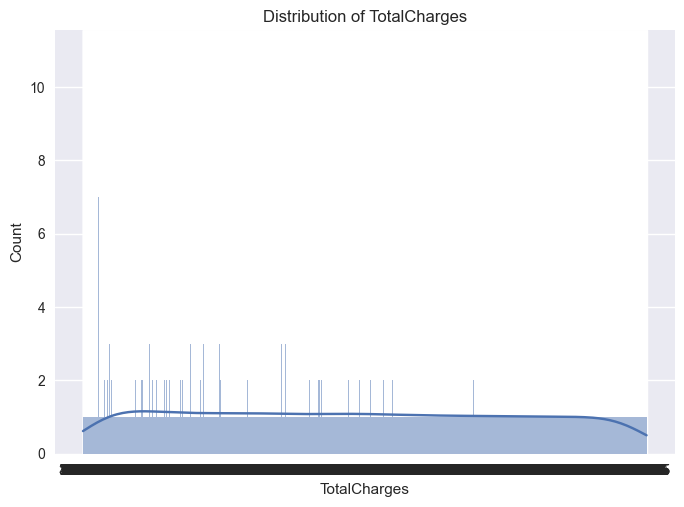

In [12]:
for col in num_features:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

**Observations:**
- `tenure` is right-skewed, indicating a large number of relatively new customers.
- `MonthlyCharges` shows substantial variability, suggesting heterogeneous service usage.


5.2 Numerical Features vs Churn

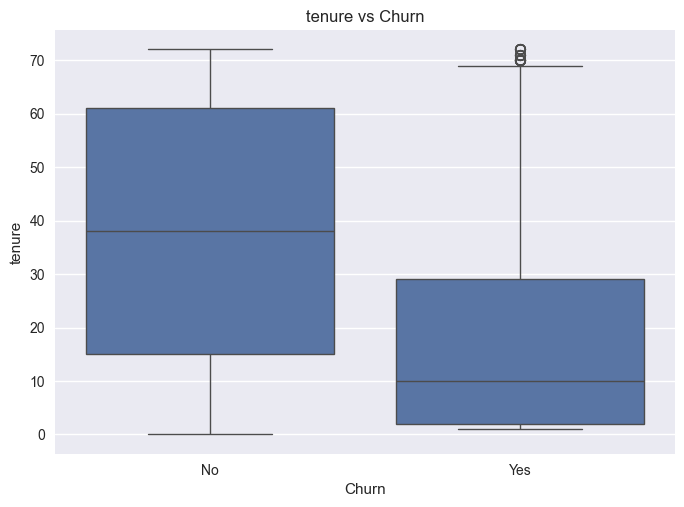

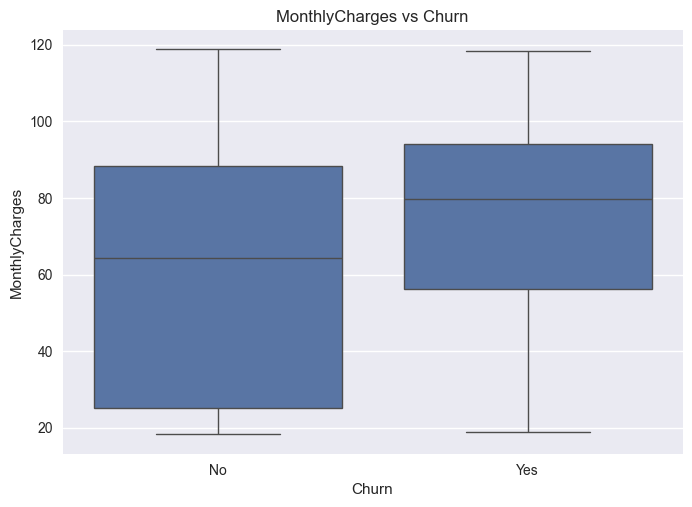

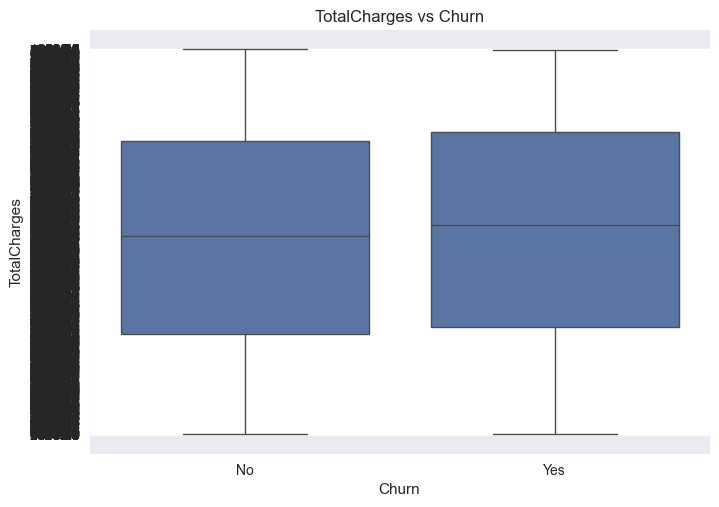

In [13]:
for col in num_features:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.show()

**Insights:**
- Customers who churn tend to have significantly shorter tenure.
- Higher monthly charges are associated with increased churn probability.
- These patterns suggest both pricing and customer lifetime effects.


**6. Categorical Features Analysis**

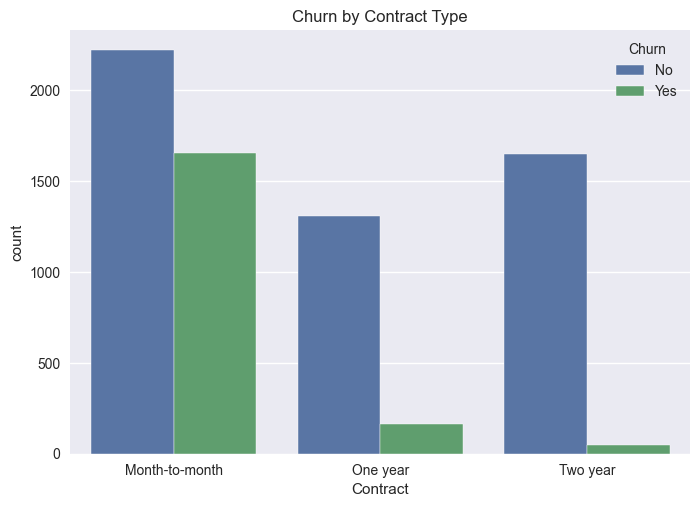

In [14]:
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()


**Insight:**
- Month-to-month contracts exhibit substantially higher churn rates.
- Long-term contracts appear to act as a strong retention mechanism.


6.2 Payment Method

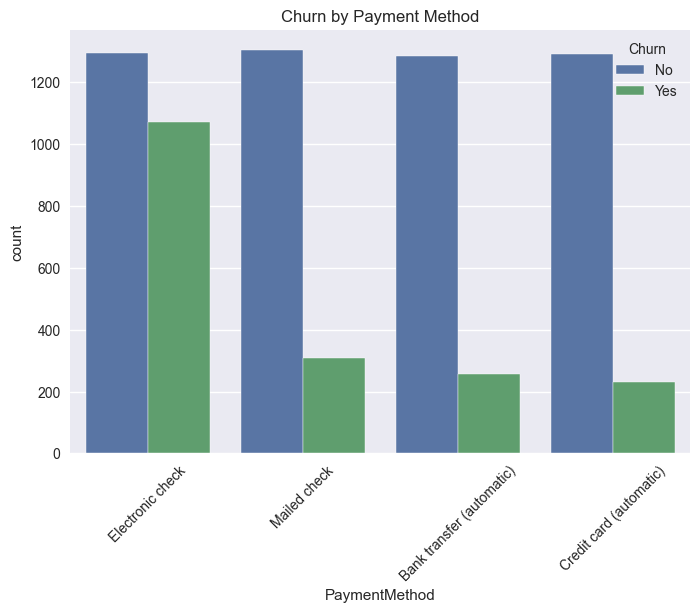

In [15]:
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


**Insight:**
- Certain payment methods are associated with higher churn.
- This may reflect underlying customer behavior rather than a causal effect.


**7. Correlation Analysis (Numerical)**

In [18]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

**Note:**
`TotalCharges` was converted from string to numeric format.
Missing values correspond to customers with very short tenure, which will be handled during preprocessing.

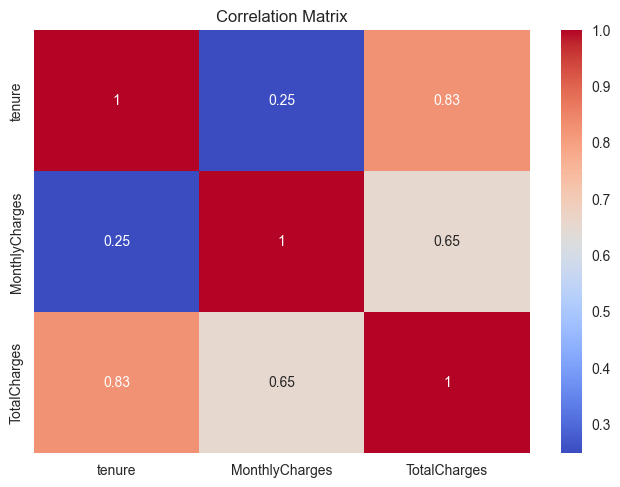

In [19]:
corr = df[num_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Observations:**
- `TotalCharges` is strongly correlated with tenure.
- This multicollinearity will be considered during feature engineering.


**8. Missing Values Analysis**

In [17]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observations:**
- Missing values are primarily concentrated in `TotalCharges`.
- Given the strong correlation with tenure, this likely corresponds to new customers.
- Imputation strategies will be evaluated in the preprocessing stage.


**9. Key Hypotheses Formulation**

Based on the exploratory analysis, we formulate the following hypotheses:

1. Customers with shorter tenure are significantly more likely to churn.
2. Contract type is one of the strongest predictors of churn.
3. Higher monthly charges increase churn risk, particularly for short-term customers.
4. Feature interactions (e.g., tenure × contract type) may improve predictive performance.


**10. EDA Summary & Next Steps**

### Summary

The exploratory analysis reveals clear behavioral and contractual patterns associated with customer churn.  
These findings motivate a modeling approach that emphasizes interpretability and robust evaluation metrics.

### Next Steps
- Feature engineering informed by EDA insights
- Baseline logistic regression
- Comparison with tree-based models
- Model explainability using feature importance and SHAP values
